### Closing Price Prediction done for Zomato Stocks

In [88]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ZOMATO.NS.csv')

# Now you can work with the dataset using pandas or any other library


In [89]:
df.head()

,price
0,54.950001
1,54.549999
2,53.650002
3,53.950001
4,54.799999


In [90]:
df['time'] = range(1, len(df) + 1)

In [91]:
df.head()

,price,time
0,54.950001,1
1,54.549999,2
2,53.650002,3
3,53.950001,4
4,54.799999,5


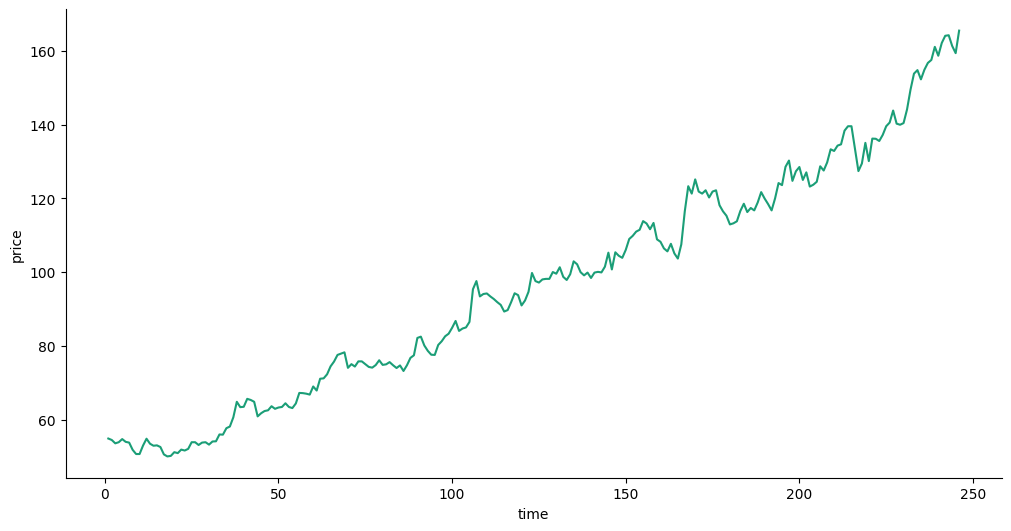

In [92]:
# @title time vs price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('price')

In [93]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the linear regression model on 'time' vs 'value'
model.fit(df[['time']], df['price'])

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: 43.349724553774706
Coefficient: 0.4296144896076965


In [94]:
predicted_values = model.predict(df[['time']])

In [95]:
df['predicted_trend']=predicted_values

In [96]:
df.head()


,price,time,predicted_trend
0,54.950001,1,43.779339
1,54.549999,2,44.208954
2,53.650002,3,44.638568
3,53.950001,4,45.068183
4,54.799999,5,45.497797


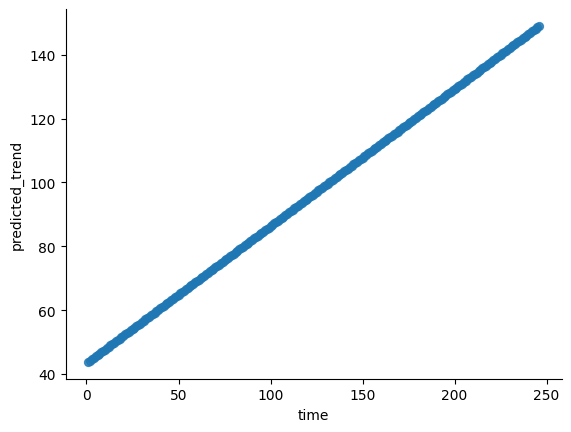

In [97]:
# @title time vs predicted_trend

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='time', y='predicted_trend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [98]:
detrended_price=df['price']-df['predicted_trend']

In [99]:
df['detrended_price']=detrended_price

In [100]:
df.head()

,price,time,predicted_trend,detrended_price
0,54.950001,1,43.779339,11.170662
1,54.549999,2,44.208954,10.341045
2,53.650002,3,44.638568,9.011434
3,53.950001,4,45.068183,8.881818
4,54.799999,5,45.497797,9.302202


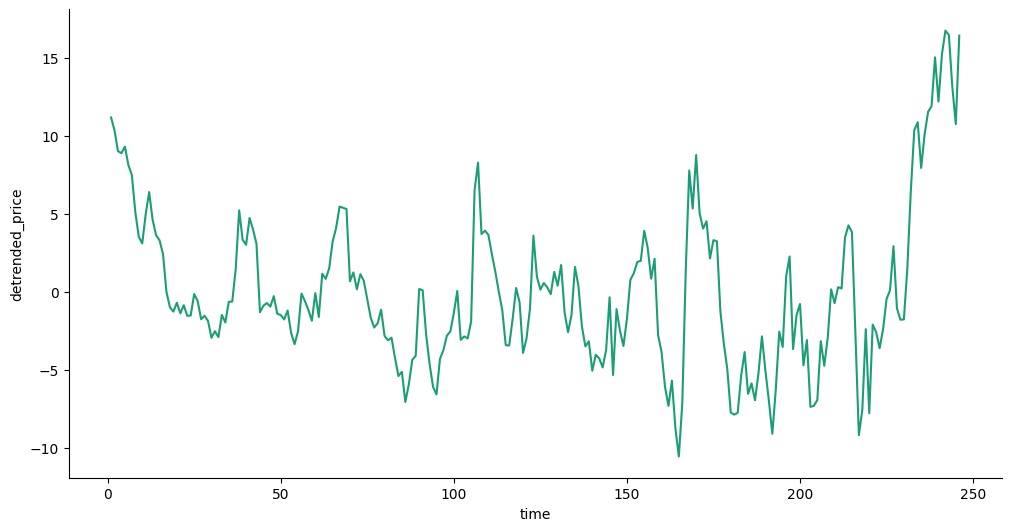

In [101]:
# @title time vs detrended_price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['detrended_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('detrended_price')

In [102]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


result = adfuller(df['detrended_price'])

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: -3.2934693731894344
p-value: 0.015172929425190463


p value < 0.05, H0 Rejected, Data is Stationary

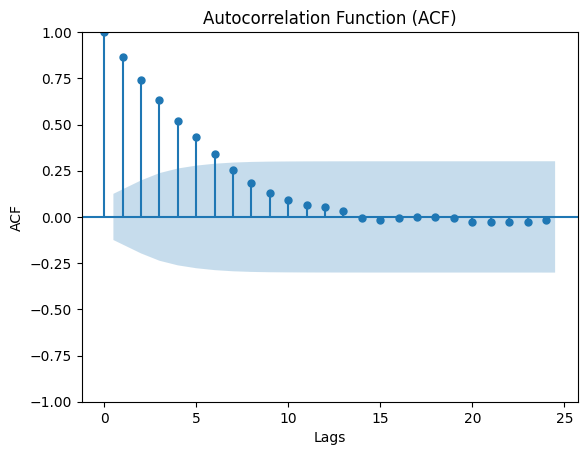

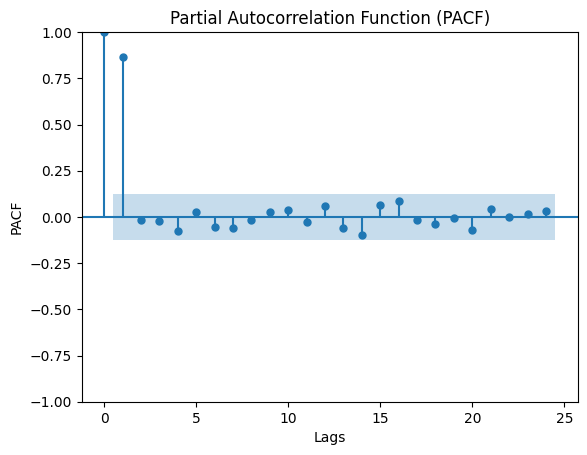

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(df['detrended_price'])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()
plt.close()

# Plot PACF
plot_pacf(df['detrended_price'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()
plt.close()




In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df['detrended_price'], order=(1, 0, 6))  # (p, d, q) = (AR order, differencing, MA order)
results = model_arima.fit()



                               SARIMAX Results                                
Dep. Variable:        detrended_price   No. Observations:                  246
Model:                 ARIMA(1, 0, 6)   Log Likelihood                -546.420
Date:                Thu, 29 Feb 2024   AIC                           1110.839
Time:                        21:39:17   BIC                           1142.387
Sample:                             0   HQIC                          1123.542
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6649      1.218      0.546      0.585      -1.722       3.052
ar.L1          0.8110      0.069     11.671      0.000       0.675       0.947
ma.L1          0.1917      0.077      2.504      0.0

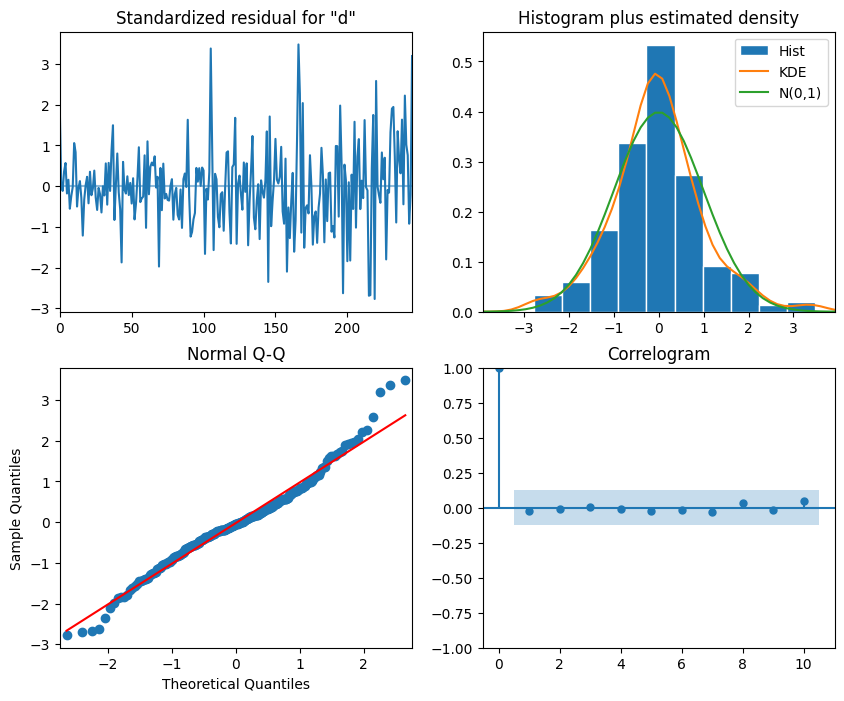

In [105]:
# Print model summary
print(results.summary())

# Plot residuals
results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [106]:
# Predict the data
predicted_values = results.predict()

# Forecast the next 5 values
arima_forecast = results.forecast(steps=5)

In [107]:
df['arima prediction']=predicted_values


In [108]:
df.head()

,price,time,predicted_trend,detrended_price,arima prediction
0,54.950001,1,43.779339,11.170662,0.664850
1,54.549999,2,44.208954,10.341045,10.205462
2,53.650002,3,44.638568,9.011434,9.277342
3,53.950001,4,45.068183,8.881818,8.059630
4,54.799999,5,45.497797,9.302202,8.014411


In [109]:
df['final_prediction']=df['arima prediction']+df['predicted_trend']

In [110]:
df.head()

,price,time,predicted_trend,detrended_price,arima prediction,final_prediction
0,54.950001,1,43.779339,11.170662,0.664850,44.444189
1,54.549999,2,44.208954,10.341045,10.205462,54.414415
2,53.650002,3,44.638568,9.011434,9.277342,53.915910
3,53.950001,4,45.068183,8.881818,8.059630,53.127813
4,54.799999,5,45.497797,9.302202,8.014411,53.512208


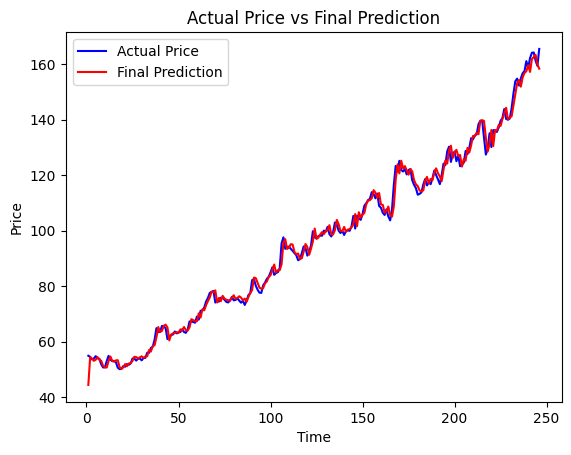

In [116]:
plt.plot(df['time'], df['price'], label='Actual Price', color='blue')
plt.plot(df['time'], df['final_prediction'], label='Final Prediction', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual Price vs Final Prediction')
plt.legend()
plt.show()

In [111]:
df.tail()

,price,time,predicted_trend,detrended_price,arima prediction,final_prediction
241,164.050003,242,147.316431,16.733572,14.473050,161.789481
242,164.199997,243,147.746046,16.453951,14.765108,162.511154
243,161.300003,244,148.175660,13.124343,15.176386,163.352046
244,159.350006,245,148.605275,10.744731,11.212654,159.817929
245,165.449997,246,149.034889,16.415108,9.311494,158.346383


In [112]:
trend_forecast=model.predict([[247],[248],[249],[250],[251]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [113]:
print(trend_forecast)
print(arima_forecast)


[149.46450349 149.89411798 150.32373247 150.75334696 151.18296145]
246    15.770063
247    14.116170
248    12.316090
249     9.611024
250     8.910123
Name: predicted_mean, dtype: float64


In [114]:
final_forecast=trend_forecast+arima_forecast

###Forecasted Values for Next 5 Time Steps

In [117]:
print(final_forecast) #Forecasted values for next 5 time steps

246    165.234567
247    164.010288
248    162.639823
249    160.364371
250    160.093084
Name: predicted_mean, dtype: float64


In [118]:
df.to_csv('output.csv', index=False)